Train Score: -0.04 - Test Score: -0.73 - Hyperparameters: {'C': 8.498184963633468, 'epsilon': 2.7943644303621658}
Train Score: -0.05 - Test Score: -0.73 - Hyperparameters: {'C': 3.1208251088296253, 'epsilon': 8.893432904641893}
Train Score: -0.04 - Test Score: -0.73 - Hyperparameters: {'C': 7.39205991525282, 'epsilon': 9.76956271192526}
Train Score: -0.05 - Test Score: -0.73 - Hyperparameters: {'C': 5.01178774871088, 'epsilon': 4.970673815149981}
Train Score: -0.04 - Test Score: -0.72 - Hyperparameters: {'C': 9.970800358908154, 'epsilon': 5.299364036308766}
Train Score: -0.05 - Test Score: -0.73 - Hyperparameters: {'C': 3.9107172678147686, 'epsilon': 9.029857072399539}
Train Score: -0.05 - Test Score: -0.73 - Hyperparameters: {'C': 5.307341360879138, 'epsilon': 3.035941286939624}
Train Score: -0.05 - Test Score: -0.73 - Hyperparameters: {'C': 4.833147177187105, 'epsilon': 6.568638048393258}
Train Score: -0.04 - Test Score: -0.73 - Hyperparameters: {'C': 6.937686567667381, 'epsilon': 1.

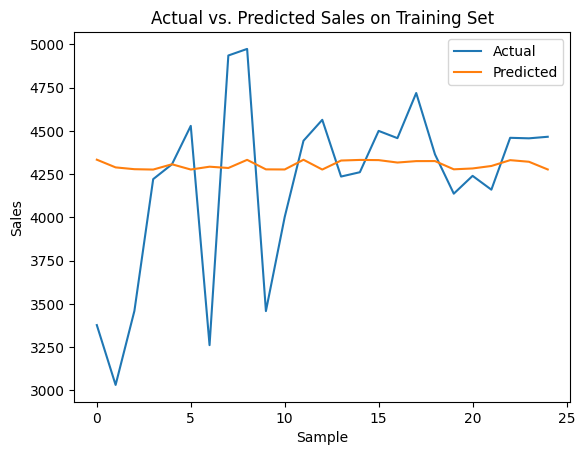

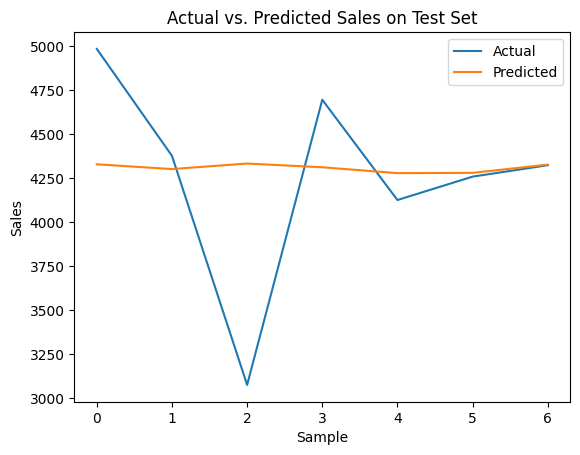

In [25]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Load data
data = pd.read_csv('data-sets/alcohol_sales.csv')

# Convert date column to datetime object
data['date'] = pd.to_datetime(data['date'])

# Set date column as the index of the DataFrame
data = data.set_index('date')

# Split data into features and target
X = data.index.values.astype(float).reshape(-1, 1)
y = data['sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameters to search
param_dist = {
    'C': uniform(loc=0.1, scale=9.9),
    'epsilon': uniform(loc=0.1, scale=9.9)
}

# Perform randomized search
random_search = RandomizedSearchCV(SVR(), param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, return_train_score=True)
random_search.fit(X_train, y_train)

# Print cross-validation results
cv_results = random_search.cv_results_
for mean_train_score, mean_test_score, params in zip(cv_results['mean_train_score'], cv_results['mean_test_score'], cv_results['params']):
    print(f"Train Score: {mean_train_score:.2f} - Test Score: {mean_test_score:.2f} - Hyperparameters: {params}")

# Print best hyperparameters
print("Best Parameters", random_search.best_params_)

# Train the model with best hyperparameters
model = SVR(**random_search.best_params_)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Plot actual vs. predicted values on training set during each epoch
plt.plot(y_train.values, label='Actual')
plt.plot(model.predict(X_train), label='Predicted')
plt.title('Actual vs. Predicted Sales on Training Set')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot actual vs. predicted values on test set
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Sales on Test Set')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.show()
